## Insurance Claims- Fraud Detection
Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

 

Note: Use the link below to reach to your dataset. 


Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/Automobile_insurance_fraud.csv

In [1]:
# Importing Rqd libraries
import pandas as pd
from sklearn import metrics
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


#### Obs: The dataset clearly shows some '?' values .

In [3]:
df.shape

(1000, 40)

In [4]:
df.dtypes  

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

#### Obs: The dataset contains, 2 float variables, 17 int variable, 21 object variables. We will deal with this in further steps.

# Checking Nulls

In [6]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

#### Obs: only _c39 column has null values.

In [7]:
df.isin(['?']).sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

#### Obs:  '?' values might be the cause of Object datatype for columns collision_type, property_damage , police_report_available .

In [8]:
# converting '?' values into NaN values
df = df.replace('?',np.NaN)

In [9]:
df.isin(['?']).sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [10]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

#### Obs: We have 0 '?' values but we have some nan values In the collision_type, property_damage, police_report_available, and _c39 columns, means the '?' is successfully replaced with nan values, thus we can now fill them.

In [11]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [12]:
df['property_damage'].value_counts()

NO     338
YES    302
Name: property_damage, dtype: int64

In [13]:
df['police_report_available'].value_counts()

NO     343
YES    314
Name: police_report_available, dtype: int64

In [14]:
## Will repalce the collision type with the mode value
df['collision_type']=df['collision_type'].fillna(df['collision_type'].mode()[0])

## Will replace the property damage info as 'no' for nan values                                                  
df['property_damage']=df['property_damage'].replace(np.nan,'NO')

## We also repalce NO with nan values where police report had ? in our dataset.                                                 
df['police_report_available']=df['police_report_available'].replace(np.nan,'NO')

# we will remove _c39 because it all contain null values
df=df.drop(['_c39'],axis=1)

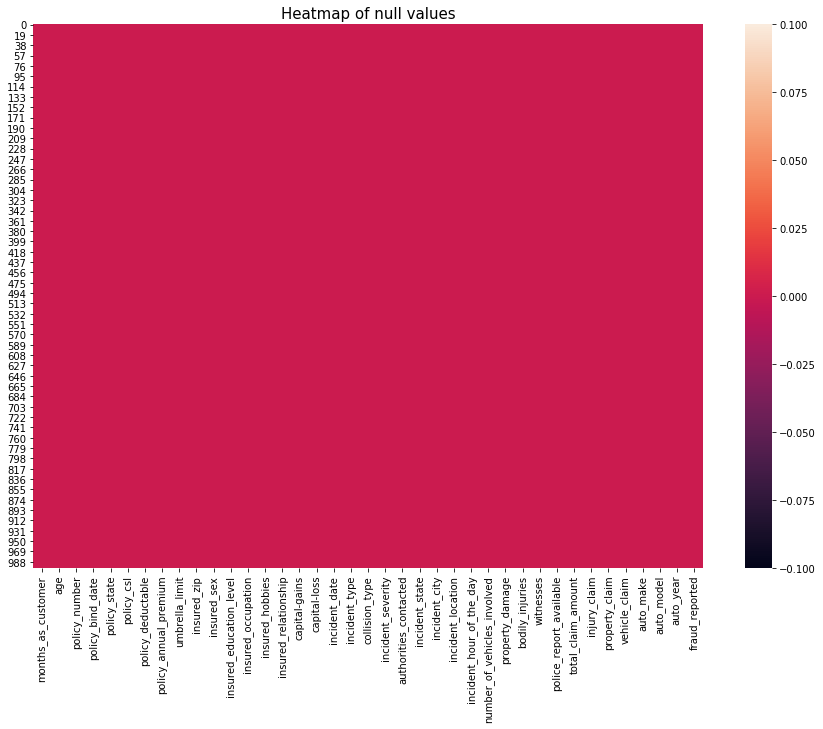

In [15]:
#Now we are ploting heatmap for checking null values 
plt.figure(figsize=(15,10))
plt.title('Heatmap of null values',fontsize=15)
sns.heatmap(df.isnull());

#### Obs: No null values are noticed, we filled the null values.

In [16]:
## Checking unique values
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [17]:
## Creating a new feature for 'vehicle age'
df['vechicle_age']=2021-df['auto_year']

In [18]:
## let's delete unnecassary columns
df=df.drop(['policy_number','insured_zip','incident_location','auto_year','policy_bind_date','policy_state','incident_date'],axis=1)

In [19]:
## Selecting object data type
do=df.select_dtypes(include='object')

In [20]:
for i in do:
    print('--------------',i,'---------------------------')
    print(do[i].value_counts())

-------------- policy_csl ---------------------------
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
-------------- insured_sex ---------------------------
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
-------------- insured_education_level ---------------------------
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
-------------- insured_occupation ---------------------------
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
-------------- insured_hobbies ---------------------------
reading     

# Statistical Summary:

In [21]:
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,vechicle_age
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,15.897000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,6.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,11.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,16.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,21.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,26.000000


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00
number_of_vehicles_involved,1000.0,1.839000e+00,1.018880e+00,1.00,1.0000,1.0,3.000,4.00
bodily_injuries,1000.0,9.920000e-01,8.201272e-01,0.00,0.0000,1.0,2.000,2.00


#### Obs: There is no missing value in numerical data. Minimum age is 19 and maximum age is 64. Policy number is the unique id that we will drop since it is not required. policy_deductable is a discrete data. Minimum annual premium is 433.33 and maximum annual premium is 2047.59. There are negative numbers for Minimum umbrella limit, so we will have to analyze that again. number_of_vehicles_involved, bodily_injuries, witnesses features contain discrete data.

## EDA 
## Data Visualization: 

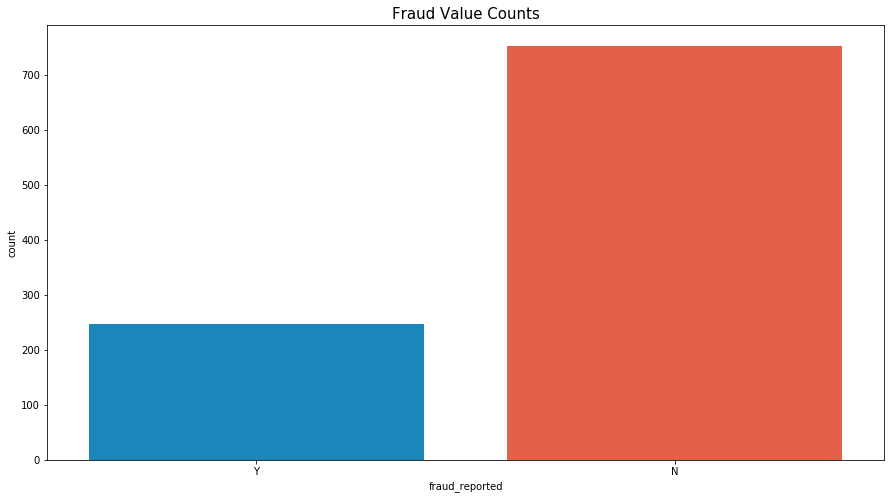

In [23]:
plt.figure(figsize=(15,8))
plt.title('Fraud Value Counts',fontsize=15)
plt.style.use('fivethirtyeight')
sns.countplot(df['fraud_reported'], data=df);

#### 32 % insurance claims reported as Yes in our dataset and 68 % as No

In [24]:
def value_count(df,col):
    plt.figure(figsize=(15,8))
    plt.title(col+' no of counts',fontsize=15)
    plt.style.use('fivethirtyeight')
    sns.countplot(df[col], data=df)

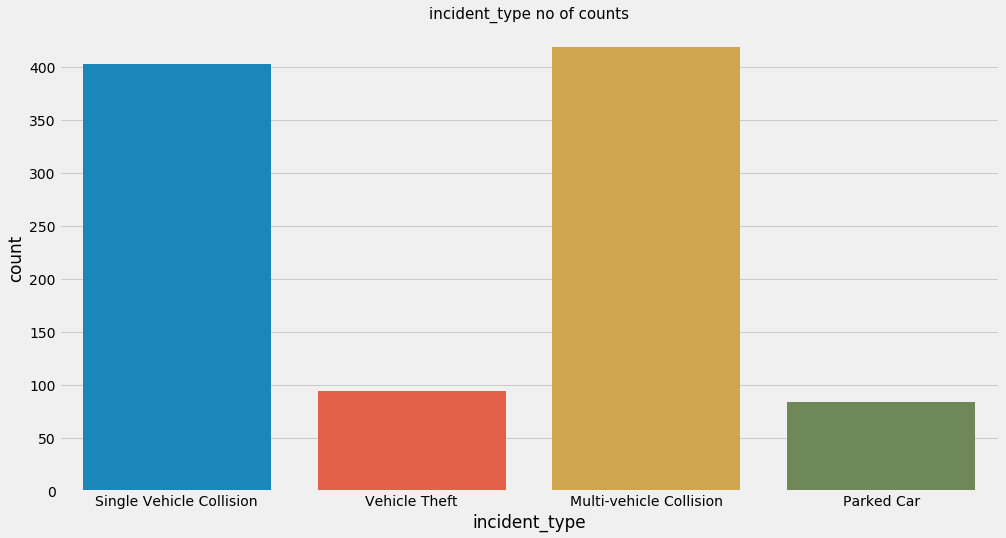

In [25]:
value_count(df,'incident_type')

#### A major issue in accidents is multi-vehicle collisions. Most insurance claims are for accidental vehicles. fer for theft vehicles.

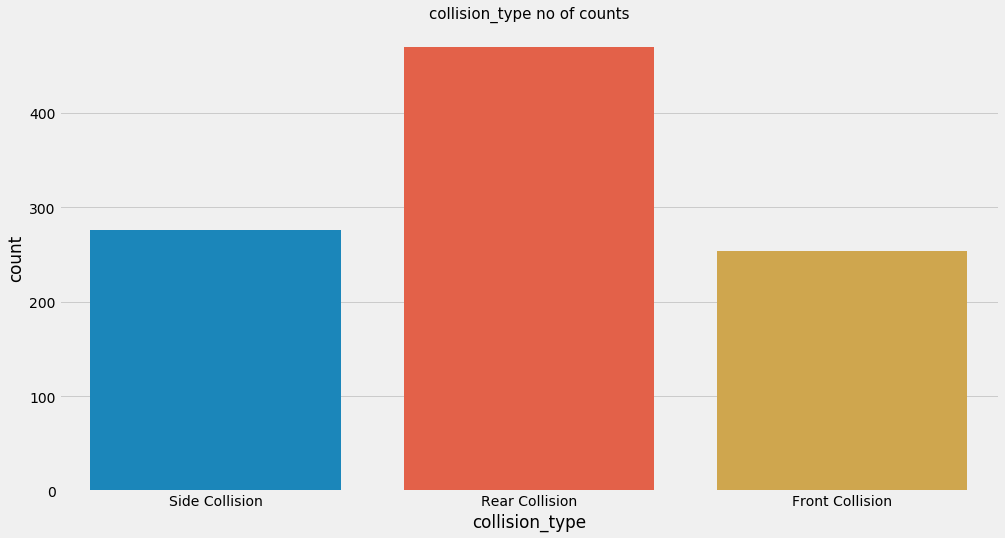

In [26]:
value_count(df,'collision_type')

#### The type of collision of most vehicles is the rear collision, side collision, and front collision are approximately the same

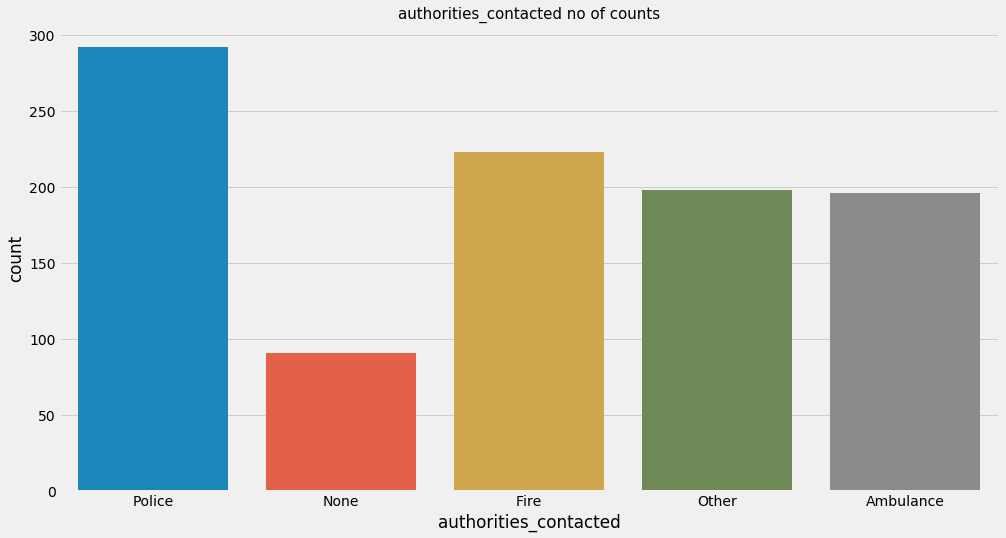

In [27]:
value_count(df,'authorities_contacted')

#### In many cases, vehicle owners call the police first. A fire following a collision may be the second major reason.

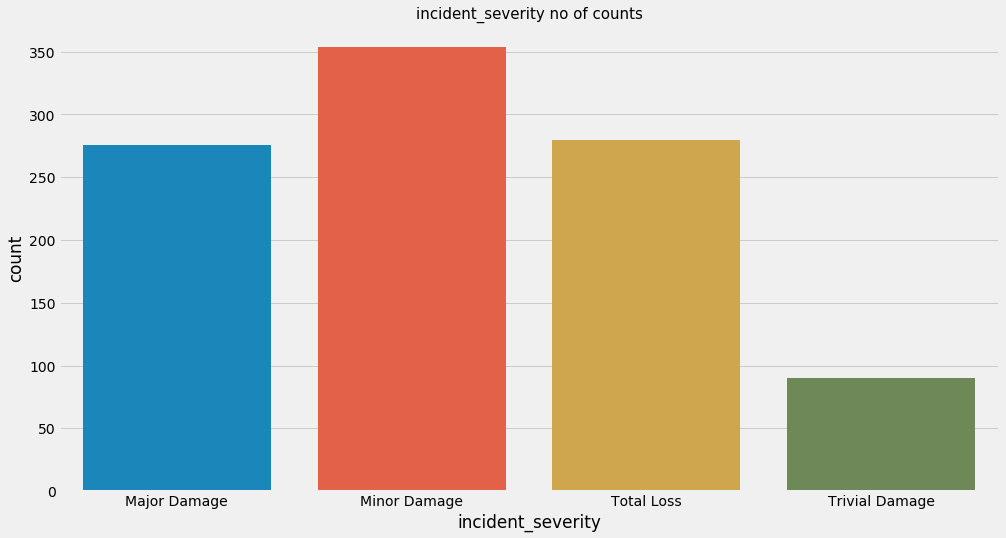

In [28]:
value_count(df,'incident_severity')

#### A majority of insurance claims involve minor damage to the vehicle. There are 280 major damage vehicles in our dataset.

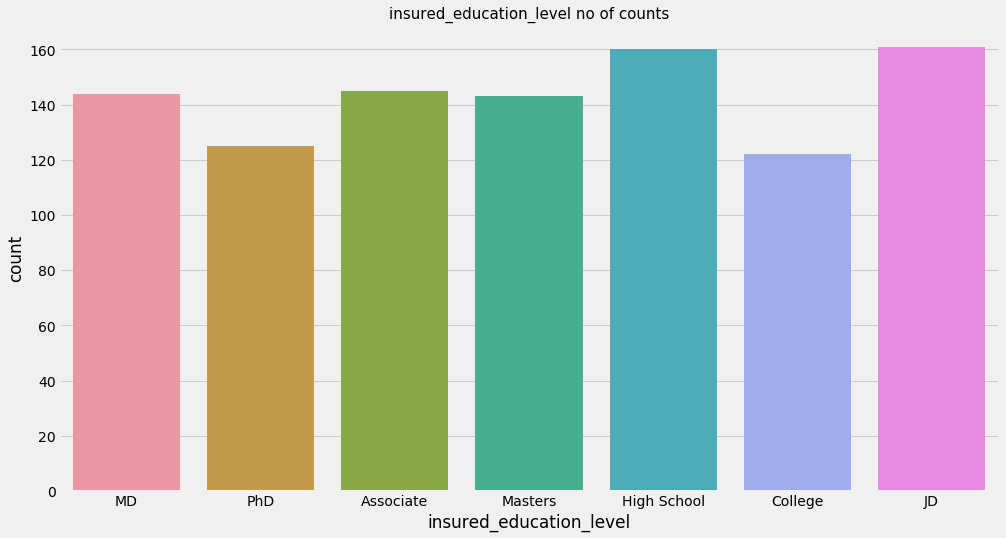

In [29]:
# Breakdown of Average Vehicle claim by insured's education level, grouped by fraud reported
value_count(df,'insured_education_level')

#### Highscool passout and doctor of law are the major persons who claimed for Insurance

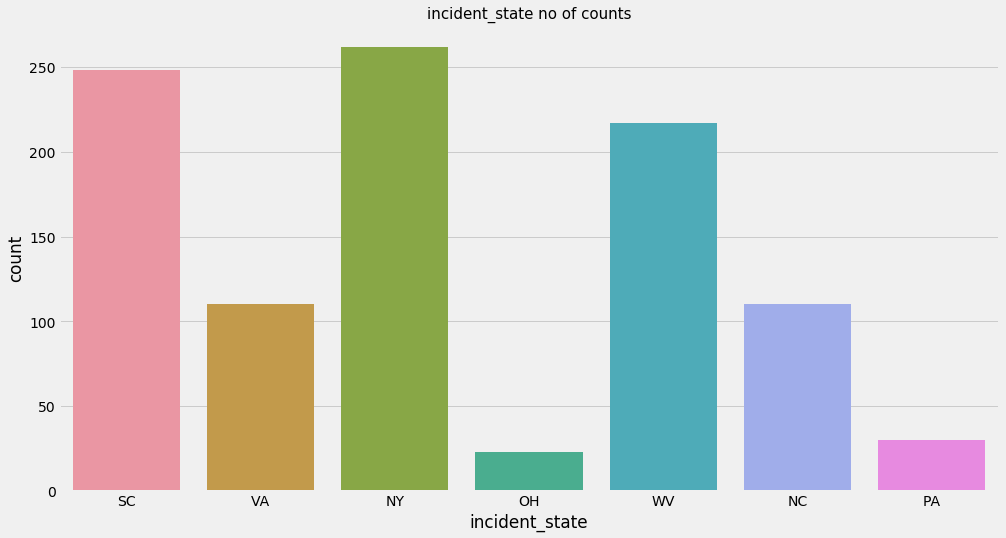

In [30]:
value_count(df,'incident_state')

#### Majority of accident spotted in NY followed by SC in USA.

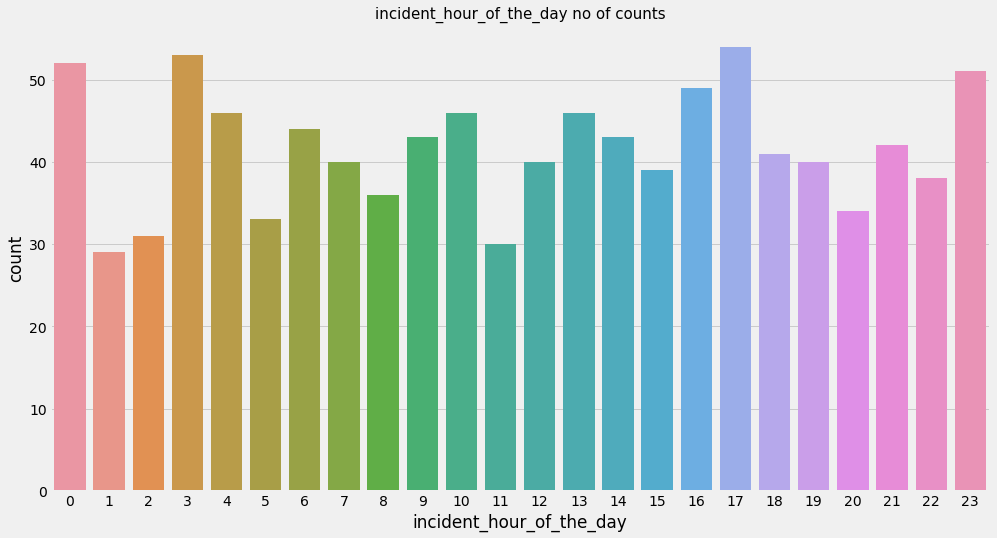

In [31]:
value_count(df,'incident_hour_of_the_day')

#### Midnight and from 12pm to 5pm are high accident times.

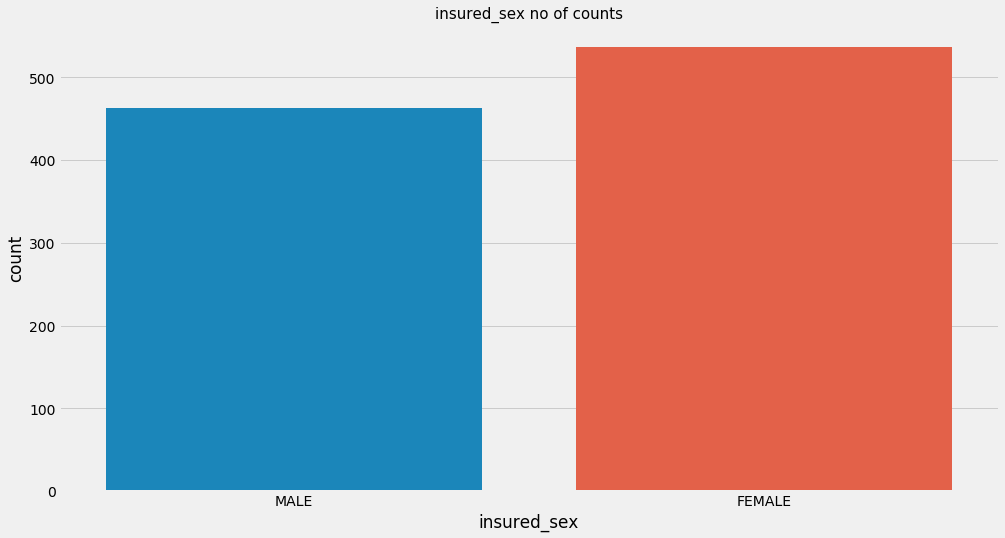

In [32]:
value_count(df,'insured_sex')

#### Females claims more than men for vehicle insurance.

## Visualization with target col

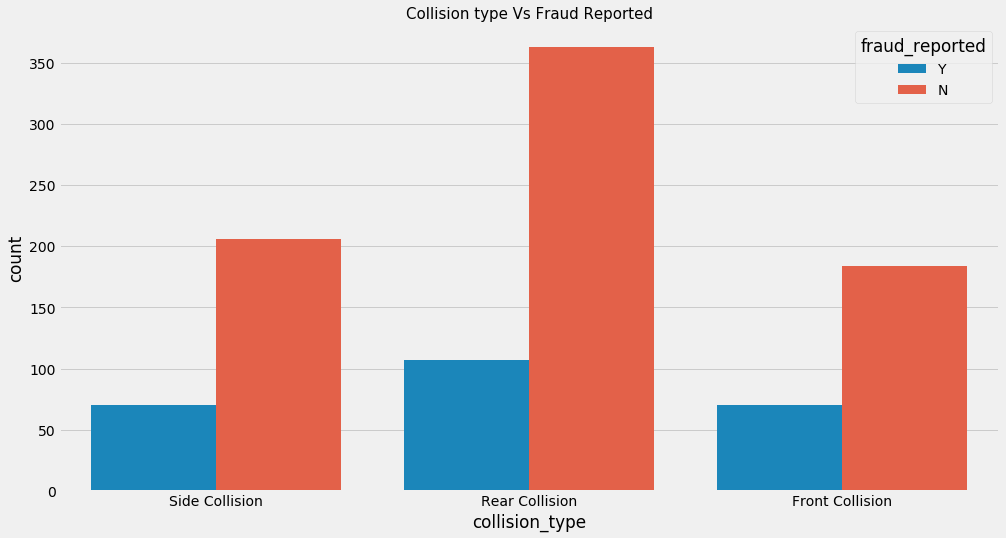

In [33]:
plt.figure(figsize=(15,8))
plt.title('Collision type Vs Fraud Reported',fontsize=15)
plt.style.use('fivethirtyeight')
sns.countplot(df['collision_type'],hue='fraud_reported',data=df);

#### rear collision most genuine applicant claim for insurance cover. There has been lease fraud reported in rear collision cases.

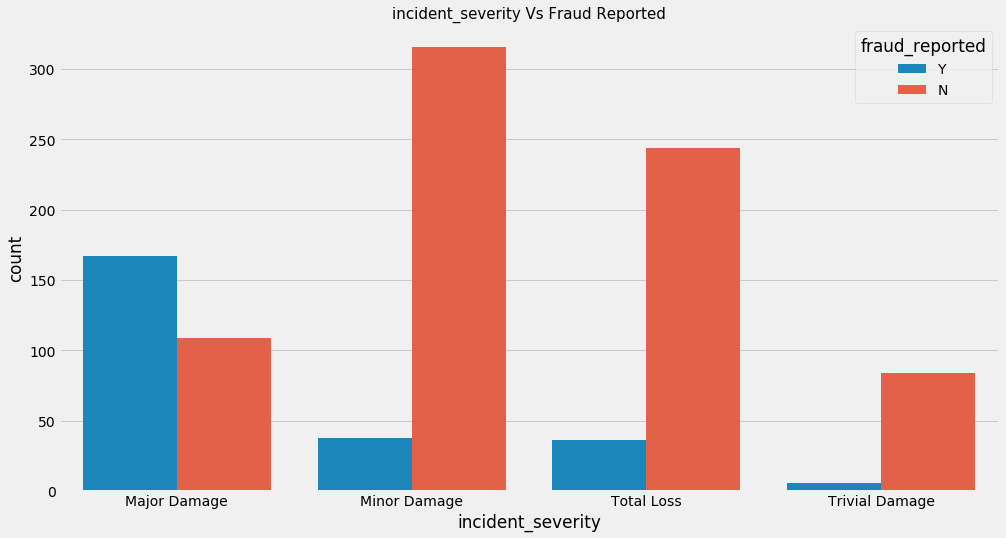

In [34]:
plt.figure(figsize=(15,8))
plt.title('incident_severity Vs Fraud Reported',fontsize=15)
plt.style.use('fivethirtyeight')
sns.countplot(df['incident_severity'],hue='fraud_reported',data=df);

#### 1-In mAjor damage case most of Fraud insurance claims reported.

#### 2-In minor case we could see very least cases reported to froud as compared to number of cases reported of minor damage.

#### 3- In trivial damage, lowest fraud reported.

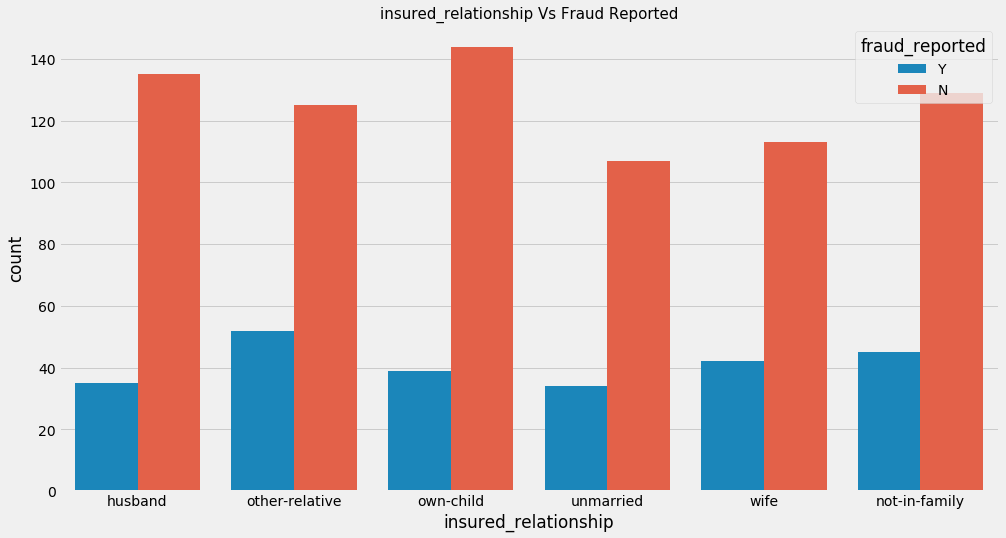

In [35]:
plt.figure(figsize=(15,8))
plt.title('insured_relationship Vs Fraud Reported',fontsize=15)
sns.countplot(df['insured_relationship'],hue='fraud_reported',data=df);

#### Fraud reports are more in counts in case of other relatives of insured relationship.

## Data Distribution Plot

In [36]:
df_n=df.select_dtypes(exclude='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A0EDFB1448>,
      dtype=object)

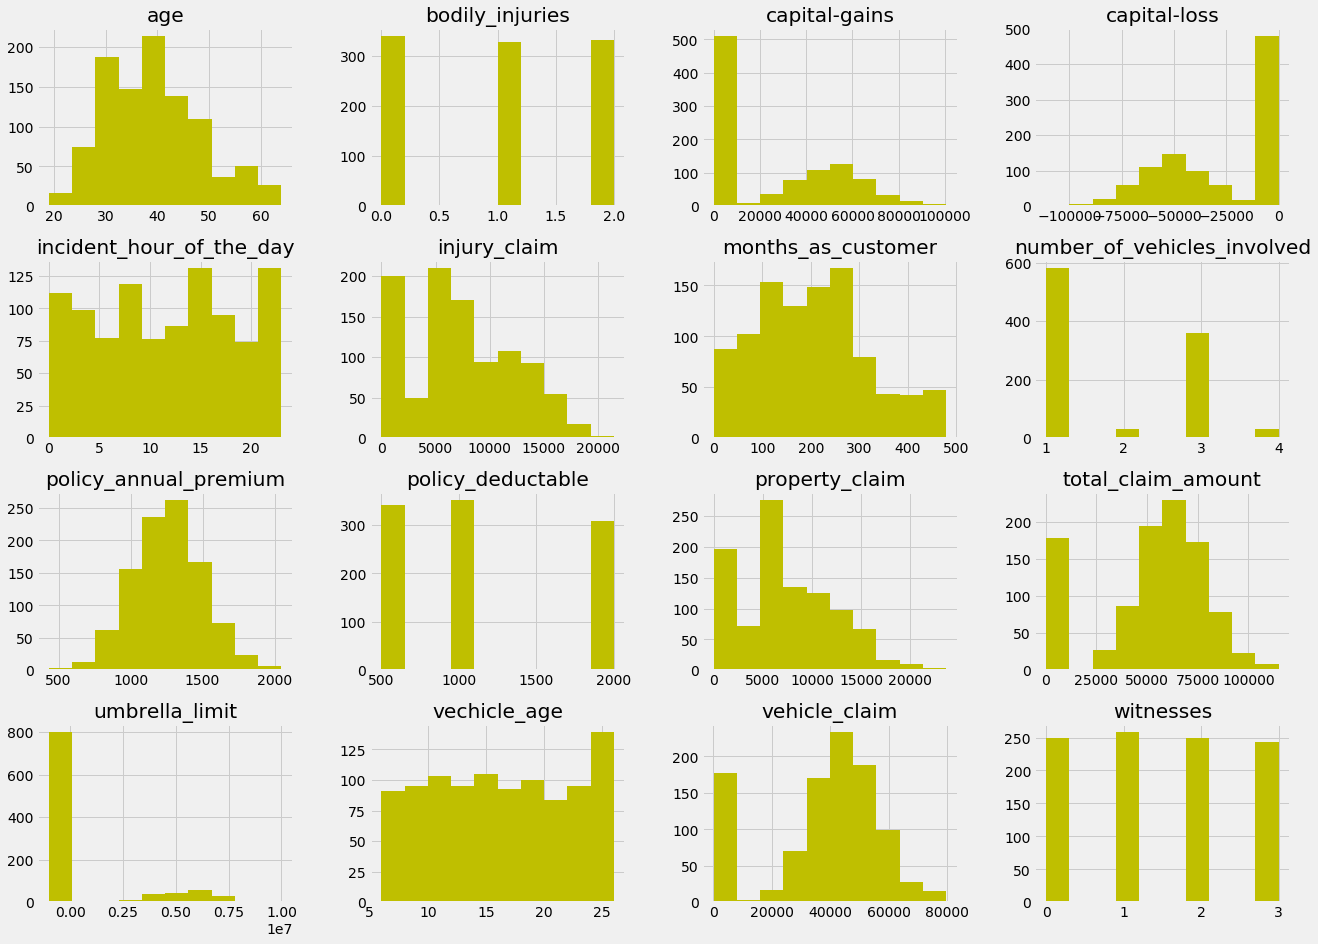

In [37]:
df_n.hist(color = 'y' , figsize=(20,15))

## Checking outliers using box plot:

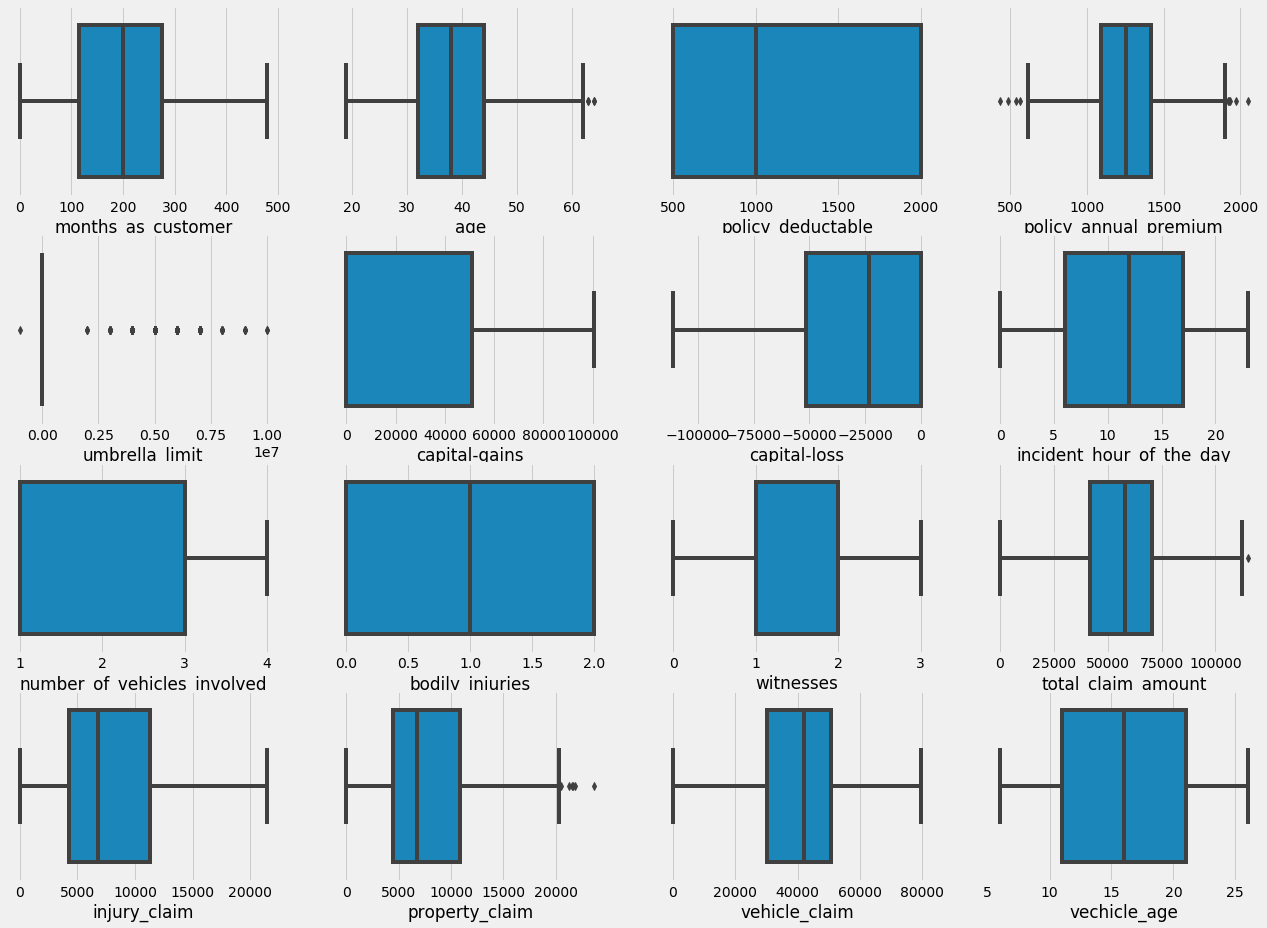

In [38]:
plt.figure(figsize=(20,15))
plot=1
for i in df_n:
    if plot<=16:
        plt.subplot(4,4,plot)
        sns.boxplot(df[i])
        plot=plot+1

#### there is no very far outliers which can impact on our prediction. So we will use it as it is

## Skewness

In [39]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
vechicle_age                   0.048289
dtype: float64

## Label Encoder:

In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in do:
    df[i]=le.fit_transform(df[i])


In [41]:
df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vechicle_age
0,328,48,1,1000,1406.91,0,1,4,2,17,...,2,1,71610,6510,13020,52080,10,1,1,17
1,228,42,1,2000,1197.22,5000000,1,4,6,15,...,0,0,5070,780,780,3510,8,12,1,14
2,134,29,0,2000,1413.14,5000000,0,6,11,2,...,3,0,34650,7700,3850,23100,4,30,0,14
3,256,41,1,2000,1415.74,6000000,0,6,1,2,...,2,0,63400,6340,6340,50720,3,34,1,7
4,228,44,2,1000,1583.91,6000000,1,0,11,2,...,1,0,6500,1300,650,4550,0,31,0,12


## Correlation:

In [42]:
df.corr()['fraud_reported']

months_as_customer             0.020544
age                            0.012143
policy_csl                    -0.037190
policy_deductable              0.014817
policy_annual_premium         -0.014480
umbrella_limit                 0.058622
insured_sex                    0.030873
insured_education_level        0.008808
insured_occupation             0.001564
insured_hobbies               -0.046838
insured_relationship           0.021043
capital-gains                 -0.019173
capital-loss                  -0.014863
incident_type                 -0.050376
collision_type                -0.017315
incident_severity             -0.405988
authorities_contacted         -0.045802
incident_state                -0.051407
incident_city                 -0.040403
incident_hour_of_the_day       0.004316
number_of_vehicles_involved    0.051839
property_damage                0.017202
bodily_injuries                0.033877
witnesses                      0.049497
police_report_available       -0.027768


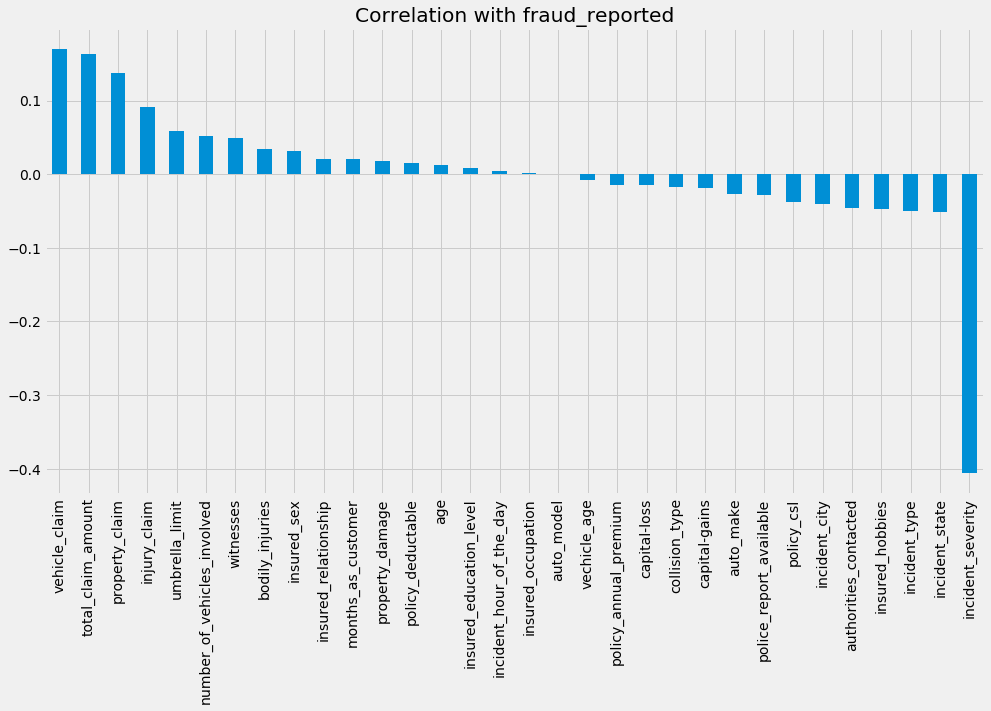

In [43]:
df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot.bar(figsize=(15,8),grid=True,title='Correlation with fraud_reported')

#### 1- Incident Severity is highly negatively correlated with our target Attribute. 2- Neither there is a very strong nor very weak correlation exist with target attribute. 3-Auto model, insured occupation has approx zero correlation with our target attribute

## Correlation using Heatmap:

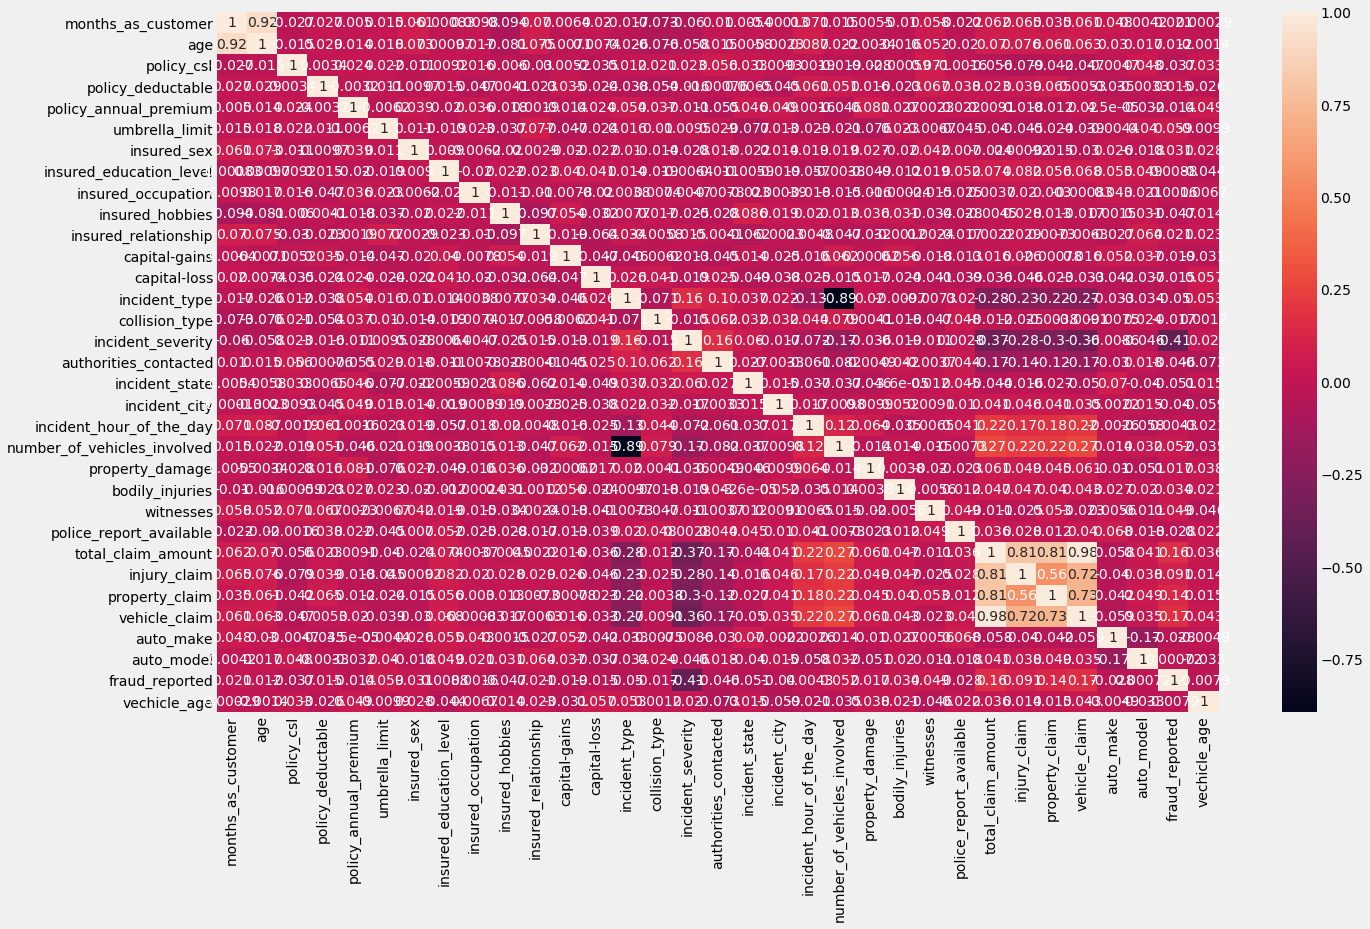

In [44]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True);

## Spliting the data in X and Y

In [45]:
x=df.drop(['fraud_reported'],axis=1)
y=df[['fraud_reported']]

## Standardization: 


In [46]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,vechicle_age
0,1.078140,0.990836,0.060937,-0.222383,0.616705,-0.479476,1.076953,0.530931,-1.158316,1.281737,...,0.009759,0.461838,1.478078,0.714257,-0.189283,1.165505,0.749653,0.856466,-1.645743,0.183440
1,0.208995,0.334073,0.060937,1.412784,-0.242521,1.697980,1.076953,0.530931,-0.162558,0.929078,...,-1.210174,-1.338700,-0.676554,-1.807312,-1.363822,-1.372696,-1.823346,0.360539,-0.657470,-0.315491
2,-0.608002,-1.088913,-1.182668,1.412784,0.642233,1.697980,-0.928546,1.557877,1.082141,-1.363201,...,1.229693,1.362107,-0.676554,-0.686362,0.054644,-0.736072,-0.785565,-0.631315,0.959702,-0.315491
3,0.452355,0.224613,0.060937,1.412784,0.652886,2.133471,-0.928546,1.557877,-1.407256,-1.363201,...,0.009759,0.461838,-0.676554,0.403135,-0.224130,-0.219722,0.677607,-0.879279,1.319074,-1.479664
4,0.208995,0.552994,1.304542,-0.222383,1.341980,2.133471,1.076953,-1.522961,1.082141,-1.363201,...,-1.210174,-0.438431,-0.676554,-1.753121,-1.257232,-1.399654,-1.768252,-1.623169,1.049545,-0.648112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.746582,-0.103769,1.304542,-0.222383,0.222884,-0.479476,-0.928546,1.044404,-1.158316,0.576420,...,-1.210174,-0.438431,-0.676554,1.305049,2.051155,0.273817,1.224309,-0.135388,-1.196528,-0.149180
996,0.704407,0.224613,-1.182668,-0.222383,0.739141,-0.479476,-0.928546,1.557877,0.584261,1.281737,...,1.229693,1.362107,-0.676554,2.111466,2.182342,2.214794,1.821868,1.600357,0.780016,-1.645974
997,-0.642767,-0.541611,0.060937,-1.039966,0.520739,0.826998,-0.928546,1.044404,-1.407256,-1.186872,...,1.229693,1.362107,1.478078,0.558507,0.013648,0.020826,0.771902,1.104430,-0.028570,1.513924
998,2.208028,2.523284,1.304542,1.412784,0.411866,1.697980,1.076953,-1.522961,-0.411497,-1.715859,...,-1.210174,-0.438431,1.478078,-0.219110,-0.453708,-0.451976,-0.073580,-1.375206,-1.286371,1.181303


## Features Importance: 

In [47]:
from sklearn.ensemble import ExtraTreesClassifier
extra=ExtraTreesClassifier()
extra.fit(x,y)

ExtraTreesClassifier()

In [48]:
print(extra.feature_importances_)

[0.02838724 0.02933306 0.02367841 0.02425085 0.03085699 0.02147136
 0.01808878 0.02808528 0.03100374 0.04409454 0.02894207 0.02608397
 0.0247508  0.01620379 0.02167499 0.17573106 0.02716998 0.02822635
 0.02652118 0.02713218 0.01783257 0.01796253 0.02471808 0.02676643
 0.01682047 0.0313033  0.03076809 0.03323484 0.03331668 0.02788511
 0.02807509 0.02963019]


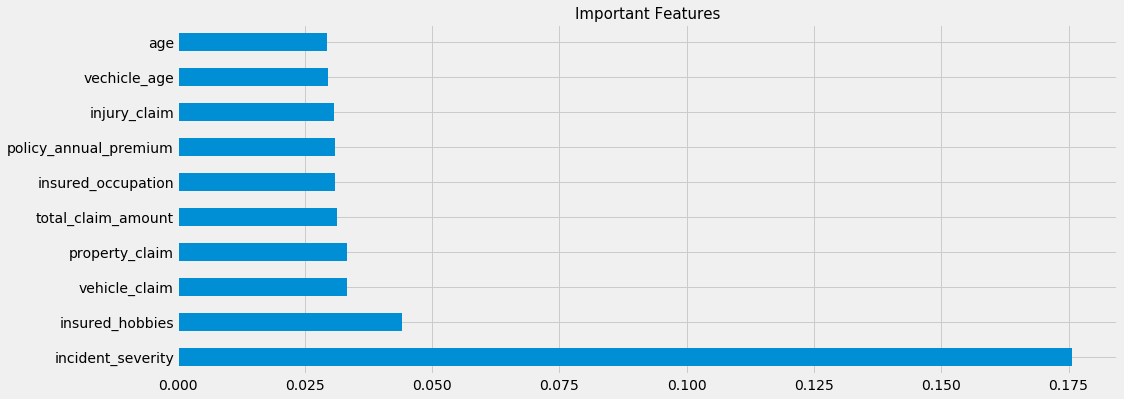

In [49]:
plt.figure(figsize=(15,6))
plt.title('Important Features',fontsize=15)
feat_importance=pd.Series(extra.feature_importances_,index=x.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show();

#### incident severity is most important feature in our dataset to predict the claim.

## Model Creation

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,roc_curve,auc,plot_roc_curve
from imblearn.combine import SMOTEENN

In [51]:
#over sampling of our Data
sm=SMOTEENN()
x_resample,y_resample=sm.fit_resample(x,y)
x_resample

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,vechicle_age
0,0.208995,0.552994,1.304542,-0.222383,1.341980,2.133471,1.076953,-1.522961,1.082141,-1.363201,...,-1.210174,-0.438431,-0.676554,-1.753121,-1.257232,-1.399654,-1.768252,-1.623169,1.049545,-0.648112
1,2.112422,2.413823,-1.182668,1.412784,-0.488623,-0.479476,-0.928546,-0.496015,-0.909377,1.105408,...,0.009759,0.461838,1.478078,2.355513,2.100350,2.131846,2.205407,-1.375206,-1.376214,-0.149180
2,-0.382024,-0.213229,1.304542,-1.039966,0.482754,-0.479476,-0.928546,0.530931,-1.158316,1.634395,...,0.009759,-1.338700,-0.676554,0.764280,-0.164686,1.215274,0.800509,-1.623169,1.229231,-1.645974
3,2.225411,2.523284,0.060937,-0.222383,-0.280465,1.262489,1.076953,0.017458,0.086382,-1.186872,...,0.009759,-1.338700,-0.676554,-0.212289,-1.523707,-0.447829,0.211426,1.104430,-0.028570,-0.980733
4,0.461047,0.443534,-1.182668,1.412784,0.269187,-0.479476,1.076953,-0.496015,0.584261,-0.128897,...,0.009759,1.362107,1.478078,-1.657624,-1.187539,-1.364401,-1.661772,1.352393,-0.926999,0.017130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,-0.010761,0.269326,0.060937,0.777151,-0.181546,-0.479476,0.557225,-1.009488,0.408947,-0.213834,...,0.325907,-0.438431,1.478078,0.003139,-0.242563,0.612736,-0.089455,0.048315,-0.371236,0.688459
840,0.545206,0.504777,0.170499,-1.039966,0.496039,-0.479476,-0.751859,-0.496015,1.353012,-1.684790,...,1.229693,0.382523,-0.676554,0.818456,-0.138045,1.269175,0.855588,1.534819,0.574220,1.362265
841,-0.466321,-0.203463,1.193585,1.266891,0.509893,-0.479476,-0.928546,0.861152,-1.140726,-0.834213,...,-1.210174,-0.358107,-0.676554,0.120555,-0.140382,-0.245455,0.267512,-0.405475,-0.185876,-1.616297
842,-1.047061,-0.883351,0.352866,1.412784,-0.055371,-0.479476,0.606173,-0.134410,-1.026251,-0.699276,...,-0.276613,0.250505,-0.676554,-0.232566,-0.537961,-0.537211,-0.048842,0.375670,0.595687,-0.627815


In [52]:
y_resample

,fraud_reported
0,0
1,0
2,0
3,0
4,0
...,...
839,1
840,1
841,1
842,1


In [53]:
def max_accuracy_score(clf,x,y):
    max_accuracy=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x_resample,y_resample,test_size=.20,random_state=i,stratify=y_resample) 
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        accuracy_check=accuracy_score(y_test,pred)
        if accuracy_check>max_accuracy:
            max_accuracy=accuracy_check
            final_r=i
    print('max accuracy score corresponding to',final_r,'is',max_accuracy*100)
    print('\n')
    print('cross validation score',cross_val_score(clf,x,y,scoring='accuracy').mean()*100)
    print('\n')
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='accuracy').std()*100)
    print('\n')
    print('F1 score',f1_score(y_test,pred)*100)
    print('\n')
    print('Training accuracy',clf.score(x_train,y_train)*100)
    print('\n')
    print('Test Accuracy',clf.score(x_test,y_test)*100)
    print('\n')
    print('Confusion Matrix',confusion_matrix(y_test,pred))
    print('\n')
    print('Classification Report',classification_report(y_test,pred))
    print('\n')
    print('Roc_auc Score',roc_auc_score(y_test,pred)*100)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc( false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate,label = "AUC = %0.2f"% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    print("\n\n")
    return final_r

## Logistic Regression: 

max accuracy score corresponding to 89 is 92.89940828402366


cross validation score 77.39999999999999


Standard Deviation 2.8705400188814676


F1 score 90.44117647058823


Training accuracy 90.07407407407408


Test Accuracy 84.61538461538461


Confusion Matrix [[ 20  16]
 [ 10 123]]


Classification Report               precision    recall  f1-score   support

           0       0.67      0.56      0.61        36
           1       0.88      0.92      0.90       133

    accuracy                           0.85       169
   macro avg       0.78      0.74      0.76       169
weighted avg       0.84      0.85      0.84       169



Roc_auc Score 74.01837928153718





89

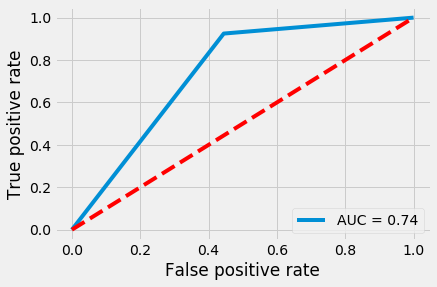

In [54]:
lr=LogisticRegression()
max_accuracy_score(lr,x,y)

## Decision Tree Classifier:

max accuracy score corresponding to 61 is 97.63313609467455


cross validation score 77.4


Standard Deviation 2.2449944320643667


F1 score 95.81749049429658


Training accuracy 100.0


Test Accuracy 93.49112426035504


Confusion Matrix [[ 32   4]
 [  7 126]]


Classification Report               precision    recall  f1-score   support

           0       0.82      0.89      0.85        36
           1       0.97      0.95      0.96       133

    accuracy                           0.93       169
   macro avg       0.89      0.92      0.91       169
weighted avg       0.94      0.93      0.94       169



Roc_auc Score 91.81286549707602





61

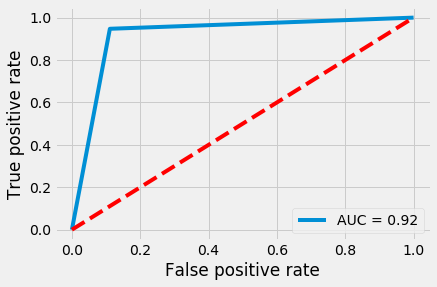

In [55]:
dt=DecisionTreeClassifier()
max_accuracy_score(dt,x,y)

## KNN: 

max accuracy score corresponding to 77 is 91.71597633136095


cross validation score 71.69999999999999


Standard Deviation 2.5416530054277646


F1 score 91.72413793103449


Training accuracy 90.96296296296296


Test Accuracy 85.79881656804734


Confusion Matrix [[ 12  24]
 [  0 133]]


Classification Report               precision    recall  f1-score   support

           0       1.00      0.33      0.50        36
           1       0.85      1.00      0.92       133

    accuracy                           0.86       169
   macro avg       0.92      0.67      0.71       169
weighted avg       0.88      0.86      0.83       169



Roc_auc Score 66.66666666666667





77

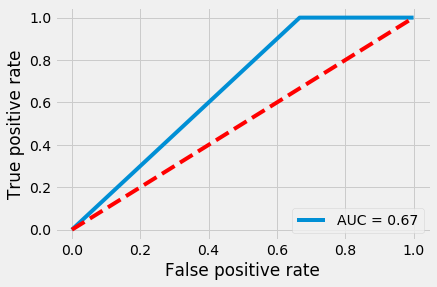

In [56]:
knn=KNeighborsClassifier()
max_accuracy_score(knn,x,y)

## Naive bayes:

max accuracy score corresponding to 79 is 92.3076923076923


cross validation score 72.09999999999998


Standard Deviation 4.8


F1 score 90.22556390977444


Training accuracy 86.66666666666667


Test Accuracy 84.61538461538461


Confusion Matrix [[ 23  13]
 [ 13 120]]


Classification Report               precision    recall  f1-score   support

           0       0.64      0.64      0.64        36
           1       0.90      0.90      0.90       133

    accuracy                           0.85       169
   macro avg       0.77      0.77      0.77       169
weighted avg       0.85      0.85      0.85       169



Roc_auc Score 77.05722639933165





79

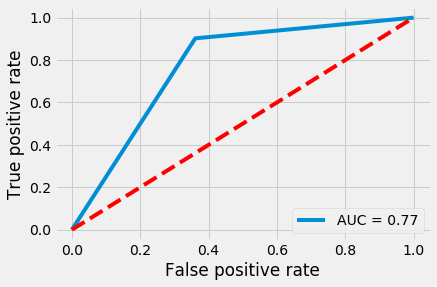

In [57]:
gnb=GaussianNB()
max_accuracy_score(gnb,x,y)

## Random Forest: 

max accuracy score corresponding to 63 is 95.85798816568047


cross validation score 76.99999999999999


Standard Deviation 2.4166091947189163


F1 score 94.8905109489051


Training accuracy 100.0


Test Accuracy 91.71597633136095


Confusion Matrix [[ 25  11]
 [  3 130]]


Classification Report               precision    recall  f1-score   support

           0       0.89      0.69      0.78        36
           1       0.92      0.98      0.95       133

    accuracy                           0.92       169
   macro avg       0.91      0.84      0.87       169
weighted avg       0.92      0.92      0.91       169



Roc_auc Score 83.59440267335005





63

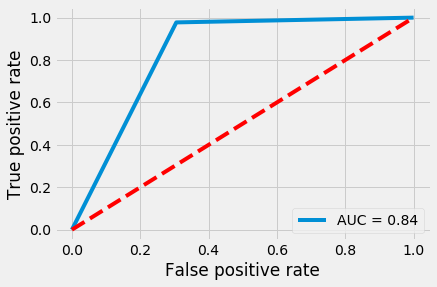

In [58]:
rf=RandomForestClassifier()
max_accuracy_score(rf,x,y)

## Ada Boost: 

max accuracy score corresponding to 46 is 98.22485207100591


cross validation score 79.7


Standard Deviation 3.4146742157927736


F1 score 96.2121212121212


Training accuracy 99.25925925925925


Test Accuracy 94.0828402366864


Confusion Matrix [[ 32   4]
 [  6 127]]


Classification Report               precision    recall  f1-score   support

           0       0.84      0.89      0.86        36
           1       0.97      0.95      0.96       133

    accuracy                           0.94       169
   macro avg       0.91      0.92      0.91       169
weighted avg       0.94      0.94      0.94       169



Roc_auc Score 92.18880534670008





46

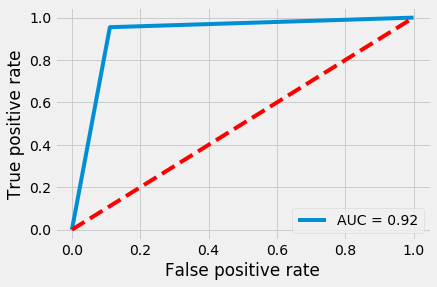

In [59]:
Adb=AdaBoostClassifier()
max_accuracy_score(Adb,x,y)

## Gradient Boost:

max accuracy score corresponding to 63 is 98.22485207100591


cross validation score 81.89999999999999


Standard Deviation 2.8354893757515627


F1 score 96.18320610687022


Training accuracy 100.0


Test Accuracy 94.0828402366864


Confusion Matrix [[ 33   3]
 [  7 126]]


Classification Report               precision    recall  f1-score   support

           0       0.82      0.92      0.87        36
           1       0.98      0.95      0.96       133

    accuracy                           0.94       169
   macro avg       0.90      0.93      0.92       169
weighted avg       0.94      0.94      0.94       169



Roc_auc Score 93.2017543859649





63

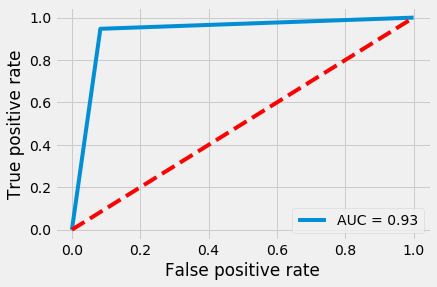

In [60]:
gb=GradientBoostingClassifier()
max_accuracy_score(gb,x,y)

## Let's check AUC-ROC curve for best fitted models: 

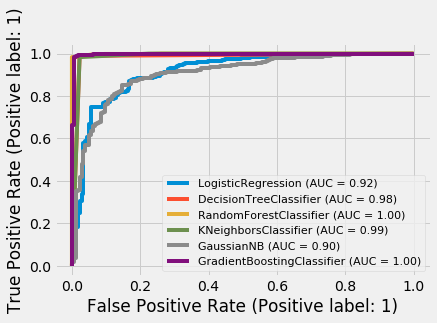

In [61]:
disp = plot_roc_curve(lr,x_resample,y_resample)
plot_roc_curve(dt,x_resample,y_resample,ax=disp.ax_)
plot_roc_curve(rf,x_resample,y_resample,ax=disp.ax_)
plot_roc_curve(knn,x_resample,y_resample,ax=disp.ax_)
plot_roc_curve(gnb,x_resample,y_resample,ax=disp.ax_)
plot_roc_curve(gb,x_resample,y_resample,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

#### The AUC curve of Gradient Boosting Classifier and Random Forest Classifier has covered 100% area under the curve.

#### the accuracy score of Gradient Boosting Classifier and the difference of Accuracy Score and CV of Gradient Boosting Classifier is least, it's the best Model. 



In [62]:
X_resampled, y_resampled = sm.fit_resample(x,y)
x_train,x_test,y_train,y_test=train_test_split(X_resampled,y_resampled,random_state=93,test_size=.20,stratify=y_resampled)

grid_param={
    "n_estimators":[12,13,15,17],
    "max_depth":range(4,12,2),
    "learning_rate":np.arange(0.1,1,0.1),
    "min_samples_split":range(4,8,2),
    "max_features":['auto', 'sqrt','log2']}

grid = GridSearchCV(gb,param_grid = grid_param)
grid.fit(x_train,y_train)
grid.best_params_

{'learning_rate': 0.5,
 'max_depth': 6,
 'max_features': 'auto',
 'min_samples_split': 4,
 'n_estimators': 17}

In [69]:
gbdt_clf = GradientBoostingClassifier(max_depth=6,min_samples_split=4,learning_rate=0.5,max_features ='auto',n_estimators=17)
gbdt_clf.fit(x_train,y_train)
pred=gbdt_clf.predict(x_train)
gbdt_clf_report = pd.DataFrame(classification_report(y_train,pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{gbdt_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,pred)}\n")


=======================Train Result===========================
Accuracy score:100.00%
_______________________________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    141.0  538.0       1.0      679.0         679.0
________________________________________________________________
 Confusion Matrix:
[[141   0]
 [  0 538]]



In [70]:
      
#####################TestScore##########################   
      
pred=gbdt_clf.predict(x_test)
clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict=True))
print("\n=======================Test Result===========================")
print(f"Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,pred)}\n")   


=======================Test Result===========================
Accuracy score:95.29%
_______________________________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.864865    0.977444  0.952941    0.921154      0.954266
recall      0.914286    0.962963  0.952941    0.938624      0.952941
f1-score    0.888889    0.970149  0.952941    0.929519      0.953419
support    35.000000  135.000000  0.952941  170.000000    170.000000
________________________________________________________________
 Confusion Matrix:
[[ 32   3]
 [  5 130]]



#### After tuning with best parameters of Gradient Boosting Classifier,we have got best accuracy of 95.78%.

In [71]:
Report = classification_report(y_test,pred)
print(Report)

              precision    recall  f1-score   support

           0       0.86      0.91      0.89        35
           1       0.98      0.96      0.97       135

    accuracy                           0.95       170
   macro avg       0.92      0.94      0.93       170
weighted avg       0.95      0.95      0.95       170



#### Classification report is showing the Precision for not fraud is 92% and for fraud its 95%, recall is showing 94% for not fraud and 95% for fraud ,f1-score for not fraud is 93 and for fraud is 95.

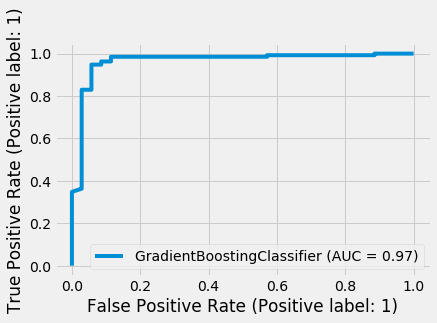

In [72]:
disp = plot_roc_curve(gbdt_clf,x_test,y_test)

#### Obs: The AUC curve of Gradient Boosting Classifier is covering 97% area under the curve.

## Saving the Model: 

In [73]:
import joblib

joblib.dump(gbdt_clf,'gb_Insur_claim.obj')

['gb_Insur_claim.obj']

## Loading the model and testing: 

In [74]:
gbdt_from_joblib=joblib.load('gb_insur_claim.obj')
gbdt_from_joblib.predict(x_test)

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])